データの読み込み

In [5]:
import os
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import japanize_matplotlib
import wordcloud

zip = "C:/Users/bi23014/Desktop/先端情報学/余りデータ/精神疾患データ.zip"

with zipfile.ZipFile(zip) as z:
    for info in z.infolist():
        info.filename = info.filename.encode("cp437").decode("cp932")
        z.extract(info)

In [13]:
path = "twitter_depression_cleaned\depression_dataset_reddit_cleaned.csv"
df = pd.read_csv(path,header=0,sep=",",encoding='UTF-8-sig')

label = df["is_depression"].tolist()
text = df["clean_text"].tolist()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bi23014\AppData\Local\Temp\ipykernel_39072\1644416798.py:1: SyntaxWarning: invalid escape sequence '\d'
  path = "twitter_depression_cleaned\depression_dataset_reddit_cleaned.csv"


データの確認

In [ ]:
#ディレクトリ作成
os.makedirs("画像")

print(plt.rcParams['font.family'])

# ラベルの分布をヒストグラムで表示
plt.figure(figsize=(10, 6))
df["is_depression"].value_counts().plot(kind='bar')
plt.title("ラベルの分布")
plt.xlabel('ラベル')
plt.ylabel('数')
plt.xticks(rotation=0)
plt.grid(True)
plt.savefig("depression_label.png")
plt.show()


In [ ]:
#ワードクラウド
from wordcloud import WordCloud
df_label_neg = df[df["is_depression"] == 1]
df_label_pos = df[df["is_depression"] == 0]
# テキストデータを結合
word_cloud_text = " ".join(df_label_neg["clean_text"].tolist())
word_cloud = WordCloud(width=800, height=400, background_color="white", font_path="C:/Windows/Fonts/msgothic.ttc").generate(word_cloud_text)
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()
#画像の保存
word_cloud.to_file("./画像/neg_svm_wordcloud.png")

# テキストデータを結合
word_cloud_text = " ".join(df_label_pos["clean_text"].tolist())
word_cloud = WordCloud(width=800, height=400, background_color="white", font_path="C:/Windows/Fonts/msgothic.ttc").generate(word_cloud_text)
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()
#画像の保存
word_cloud.to_file("./画像/pos_svm_wordcloud.png")

訓練・評価の分割

In [20]:
from sklearn.model_selection import train_test_split
from transformers.trainer_utils import set_seed

set_seed(0)
x_train,x_val,y_train,y_val = train_test_split(text,label,test_size=0.2)

c:\Users\bi23014\python-env-test\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
# テキストデータを数値ベクトルに変換
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_val_tfidf = vectorizer.transform(x_val)


0.9580


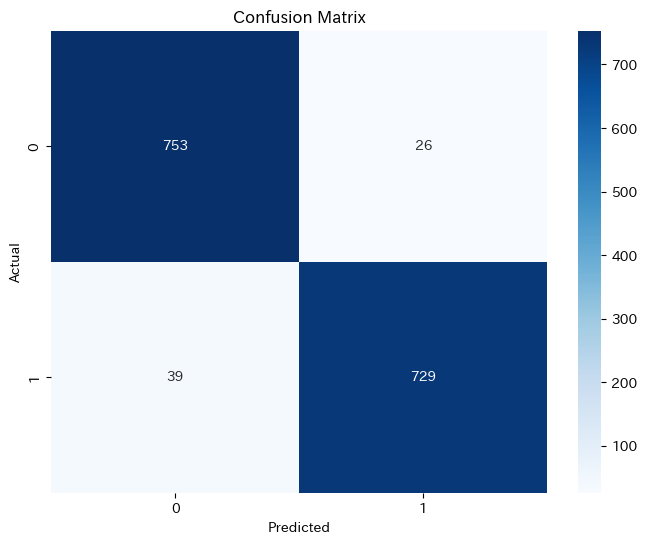

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import umap

model = svm.SVC(kernel='linear')
model.fit(x_train_tfidf,y_train)


# トレーニングデータに対する精度
pred = model.predict(x_val_tfidf)
accuracy = accuracy_score(y_val, pred)
print(f'{accuracy:.4f}')

# 混同行列を計算して表示
cm = confusion_matrix(y_val, pred)
    
# 混同行列をヒートマップとして表示
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['0','1'],
    yticklabels=['0','1'],
    annot_kws={"size": 10}
    )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()